In [2]:
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#Carregar o modelo
from keras.models import load_model
#salvar/carregar arquivos em diferentes formatos
import joblib

2022-08-05 19:10:10.961671: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 19:10:10.962932: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_maior_erro = load_model('/data/results/results_3T3/14_model__3T3_regressao_Maior_erro_Mean_squared_error_500_epochs_2022-6-30.h5')
modelo_maior_erro

2022-08-05 19:10:15.965494: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-05 19:10:15.966757: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-05 19:10:15.966817: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-05 19:10:15.966891: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a8bce4a08e2b): /proc/driver/nvidia/version does not exist
2022-08-05 19:10:15.967406: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [4]:
#84 IMAGENS SEPARADAS RANDOMICAMENTE - 40% TESTE - 208 IMAGENS

X_test_maior_erro = joblib.load('/data/results/results_3T3/15_images_de_X_test_3T3_PIOR_modelo_500_epochs2022-6-30.gz') #carregando arquivo
X_test_maior_erro.shape

(71, 200, 200, 3)

In [5]:
#84 RÓTULOS

y_test_maior_erro = joblib.load('/data/results/results_3T3/16_images_de_y_test_3T3_PIOR_modelo_500_epochs2022-6-30.gz') #carregando arquivo
y_test_maior_erro.shape

(71,)

In [6]:
#ROTULOS SALVOS EM LISTA

lista_observado_maior_erro = list(y_test_maior_erro)
len(lista_observado_maior_erro)

71

In [7]:
#PREDIÇÃO SALVO EM LISTA

dados_prev = modelo_maior_erro.predict(X_test_maior_erro)
lista_previsto_maior_erro = dados_prev.flatten().tolist()
len(lista_previsto_maior_erro)

2022-08-05 19:10:16.989730: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-05 19:10:16.993167: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800005000 Hz
2022-08-05 19:10:17.109366: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 15360000 exceeds 10% of free system memory.
2022-08-05 19:10:17.127611: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 160579584 exceeds 10% of free system memory.
2022-08-05 19:10:17.324469: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40144896 exceeds 10% of free system memory.
2022-08-05 19:10:17.363234: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 77078528 exceeds 10% of free system memory.
2022-08-05 19:10:17.418530: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18874368 exceeds 10% of free system memory.


71

In [8]:
import pandas as pd
from scipy.stats.stats import pearsonr as stats

In [9]:
#DATAFRAME - ORGANIZAÇÃO DAS LISTAS
#COLUNA 1 ROTULO/ COLUNA 2 PREDITO

df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), 
                             columns = ['Observed values','Lista preditos'])
df_maior_erro.head()

,Observed values,Lista preditos
0,610,235.107086
1,807,232.754639
2,734,237.473526
3,28,264.594879
4,259,216.330063


In [10]:
#ARREDONDANDO O PREDITO ('lista preditos')

teste = round(df_maior_erro['Lista preditos'],2)
df_maior_erro['Predicted values'] = teste
df_maior_erro.head()

,Observed values,Lista preditos,Predicted values
0,610,235.107086,235.11
1,807,232.754639,232.75
2,734,237.473526,237.47
3,28,264.594879,264.59
4,259,216.330063,216.33


In [11]:
#REORGANIZANDO AS COLUNAS

df_maior_erro = df_maior_erro.reindex(columns=['Observed values','Predicted values','Lista preditos'])
df_maior_erro.head()

,Observed values,Predicted values,Lista preditos
0,610,235.11,235.107086
1,807,232.75,232.754639
2,734,237.47,237.473526
3,28,264.59,264.594879
4,259,216.33,216.330063


In [12]:
#BIBLIOTECA CORRELAÇÃO
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação

In [13]:
#CALCULO DE CORRELAÇÃO

col1_obt = 0 #Observed value
col2_prev = 1 #Predicted values
pear_pos_maior_erro = stats(df_maior_erro[df_maior_erro.columns[col1_obt]], 
                            df_maior_erro[df_maior_erro.columns[col2_prev]])

<Figure size 1080x1080 with 0 Axes>

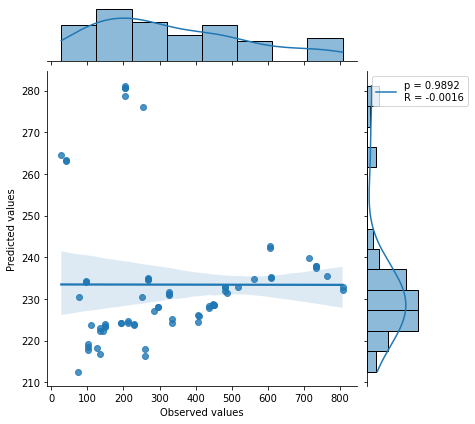

In [14]:
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df_maior_erro.columns[col1_obt],
    y=df_maior_erro.columns[col2_prev],
    kind='reg',
    data=df_maior_erro#[df_maior_erro['Lista observado'] > 300]
)

if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(round(pear_pos_maior_erro[1],4)) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r

plt.savefig(
    fname="/results/Correlation_greatest_error_3T3.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)